# **⭐ Classification Model to Identify Species of Fish**

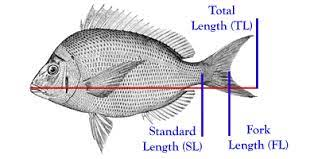

The Fish Catch data set contains measurements on 159 fish caught in the lake Laengelmavesi, Finland. For the 159 fishes of 7 species the weight, length, height, and width were measured. Three different length measurements are recorded: from the nose of the fish to the beginning of its tail, from the nose to the notch of its tail and from the nose to the end of its tail. The height and width are calculated as percentages of the third length variable. This results in 6 observed variables, Weight, Length1, Length2, Length3, Height, Width. The variable, Species, represents the grouping structure: the 7 species are 1=Bream, 2=Whitewish, 3=Roach, 4=Parkki, 5=Smelt, 6=Pike, 7=Perch.

- SL: Standard Length---Length1
- FL: Fork Length--------Length2
- TL: Total Length-------Length3
- BT: Body Thickness----Height
- BD: Body Depth--------Width

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# import data
fish = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Fish.csv')

In [3]:
# view data
fish.head()

,Category,Species,Weight,Height,Width,Length1,Length2,Length3
0,1,Bream,242.0,11.5200,4.0200,23.2,25.4,30.0
1,1,Bream,290.0,12.4800,4.3056,24.0,26.3,31.2
2,1,Bream,340.0,12.3778,4.6961,23.9,26.5,31.1
3,1,Bream,363.0,12.7300,4.4555,26.3,29.0,33.5
4,1,Bream,430.0,12.4440,5.1340,26.5,29.0,34.0


In [4]:
# info of data
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [5]:
# summary statistics
fish.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [6]:
# check for missing value
fish.isnull().sum()


Category    0
Species     0
Weight      0
Height      0
Width       0
Length1     0
Length2     0
Length3     0
dtype: int64

In [7]:
# check for categories
fish.nunique()


Category      7
Species       7
Weight      101
Height      154
Width       152
Length1     116
Length2      93
Length3     124
dtype: int64

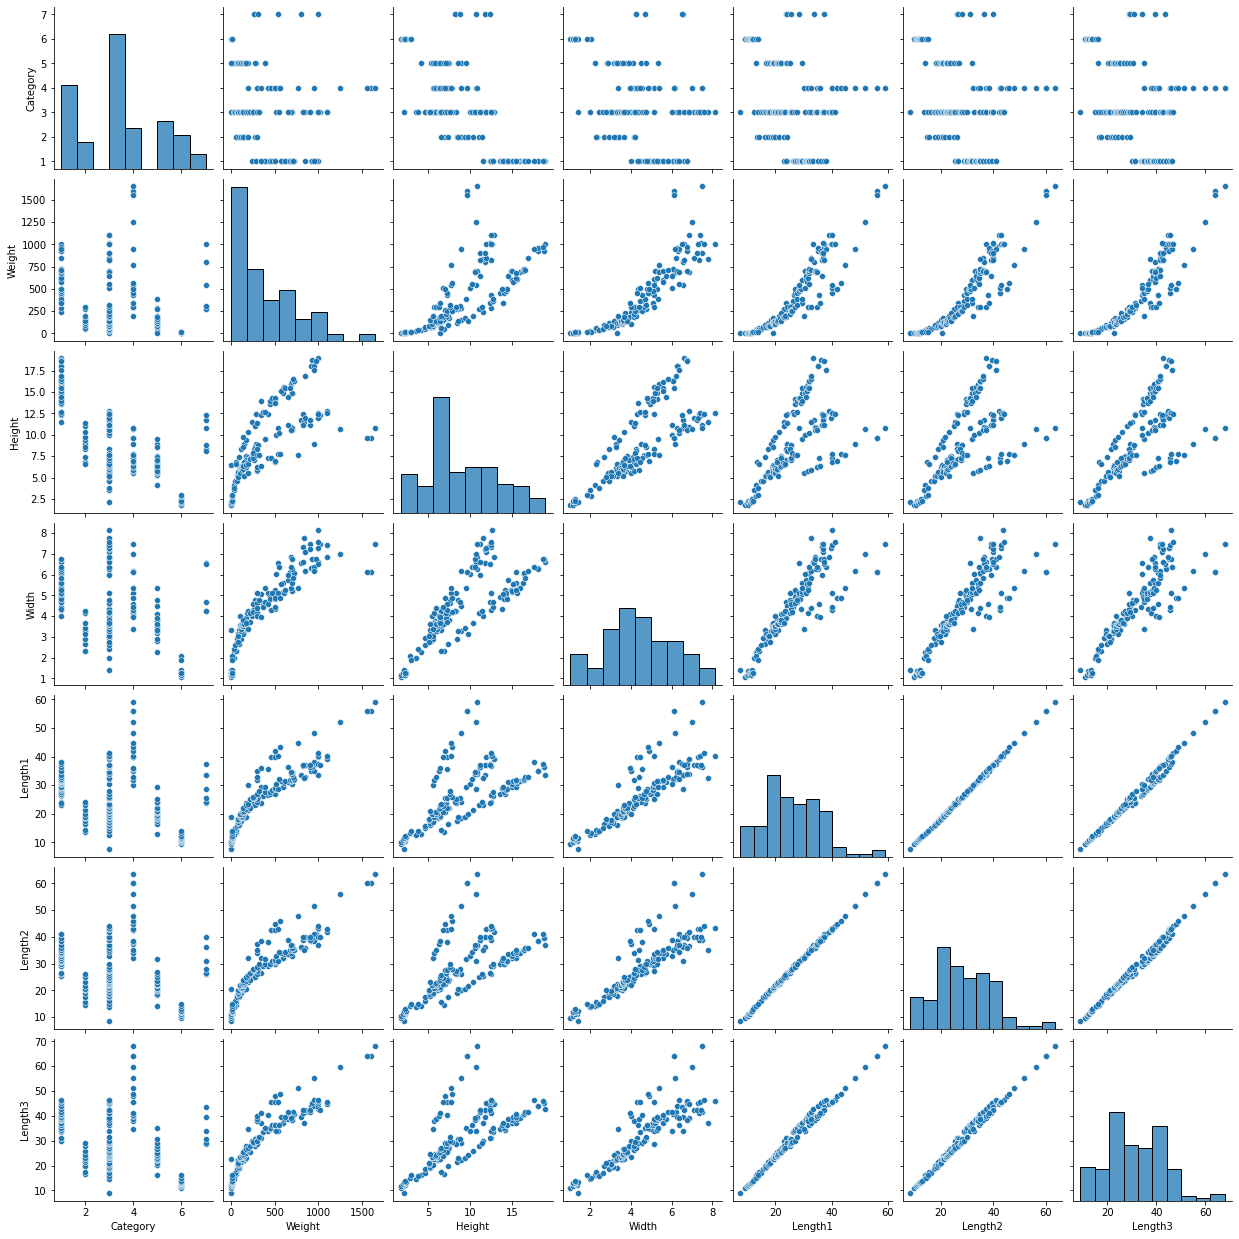

In [8]:
# visualize pairplot
sns.pairplot(fish)


In [9]:
# columns name
fish.columns


Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [10]:
# define y
Y=fish.Species


In [11]:
# define X
X=fish[['Category', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3']]


In [12]:
# split data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25,random_state=0)


In [13]:
# verify shape
for i in [xtrain,xtest,ytrain,ytest]:
    print(i.shape)

(119, 7)
(40, 7)
(119,)
(40,)


In [14]:
# select model
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [15]:
# train model
RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [16]:
# predict with model
y_pre=RFC.predict(xtest)

In [17]:
# model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
# model accuracy
accuracy_score(ytest,y_pre)

0.85

In [19]:
# model confusion matrix
confusion_matrix(ytest,y_pre)

array([[ 8,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0],
       [ 0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  0,  1]], dtype=int64)

In [20]:
# model classification report
classification_report(ytest,y_pre)

c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n       Bream       1.00      1.00      1.00         8\n      Parkki       0.00      0.00      0.00         3\n       Perch       0.72      1.00      0.84        13\n        Pike       1.00      1.00      1.00         7\n       Roach       1.00      0.80      0.89         5\n       Smelt       1.00      1.00      1.00         1\n   Whitefish       0.50      0.33      0.40         3\n\n    accuracy                           0.85        40\n   macro avg       0.75      0.73      0.73        40\nweighted avg       0.80      0.85      0.81        40\n'

In [21]:
# future prediction


In [22]:
# define X_new
x=[[3,78.0,5.1992,3.1234,16.8,18.7 ,19.4]]

In [23]:
# predict for X_new
RFC.predict(x)

c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Perch'], dtype=object)

In [24]:
from sklearn.metrics import mean

ImportError: cannot import name 'mean' from 'sklearn.metrics' (c:\Users\Lenovo\.conda\envs\ml\lib\site-packages\sklearn\metrics\__init__.py)